In [82]:
import pandas as pd
import numpy as np
import scipy.stats as scs

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [83]:
test_df = pd.read_csv('../test_results.csv')
test_result = test_df[['test', 'converted']]
test_result.dropna(axis=0)
test_result.info()
test_result.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 2 columns):
test         316800 non-null int64
converted    316800 non-null int64
dtypes: int64(2)
memory usage: 4.8 MB


,test,converted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [84]:
old_price = test_result[test_result['test']==0]
old_price.info()
old_price.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202727 entries, 0 to 316798
Data columns (total 2 columns):
test         202727 non-null int64
converted    202727 non-null int64
dtypes: int64(2)
memory usage: 4.6 MB


,test,converted
0,0,0
1,0,0
2,0,0
4,0,0
5,0,0


In [85]:
new_price = test_result[test_result['test']==1]
new_price.info()
new_price.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114073 entries, 3 to 316799
Data columns (total 2 columns):
test         114073 non-null int64
converted    114073 non-null int64
dtypes: int64(2)
memory usage: 2.6 MB


,test,converted
3,1,0
7,1,1
8,1,0
9,1,0
15,1,0


In [87]:
old_site = old_price['converted'].values

In [88]:
old_site

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
new_site = new_price['converted'].values

In [90]:
new_site

array([0, 1, 0, ..., 0, 0, 0])

In [107]:
print(sum(old_site))
print(len(old_site))
print(sum(new_site))
print(len(new_site))

print('Old site conversion rate: {}'.format(sum(old_site)/len(old_site)))
print('New site conversion rate: {}'.format(sum(new_site)/len(new_site)))

4035
202727
1773
114073
Old site conversion rate: 0.019903614220108817
New site conversion rate: 0.015542678810936857


In [91]:
# To visualize distributions
def plot_with_fill(x, y, label):
    lines = plt.plot(x, y, label=label, lw=2)
    plt.fill_between(x, 0, y, alpha=0.2, color=lines[0].get_c())
    plt.legend(loc='best')

In [108]:
'''To get pdf for beta distribution
PDF is a function, whose value at any given sample (or point) in the sample space 
(the set of possible values taken by the random variable) can be interpreted as providing 
a relative likelihood that the value of the random variable would equal that sample.
'''
def get_pdf(x, site):
    ''' 
    Parameters
    -----------
    x : Array of x values
    site : Array cooresponding to the site in question

    Returns
    --------
    numpy array
    '''
    alpha = sum(site)
    beta = len(site) - alpha
    return scs.beta(a=alpha, b=beta).pdf(x)

**Start by looking only at converstion rate for old price. We assume a uniform prior, i.e., probability of 0 or 1 equally likely. Specifically, we use a beta distribution with alpha=1 and beta=1**

Text(0.5,0,'Conversion Rate')

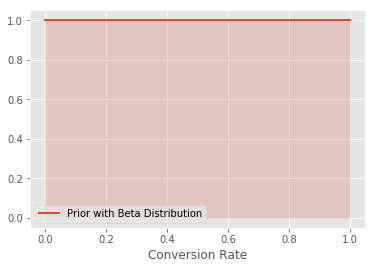

In [93]:
x = np.arange(0, 1.001, 0.001) #100 points from 0 to 1
y_prior = scs.beta(a=1, b=1).pdf(x)
plot_with_fill(x, y_prior, 'Prior with Beta Distribution')
plt.xlabel('Conversion Rate')

Text(0.5,0,'Conversion Rate')

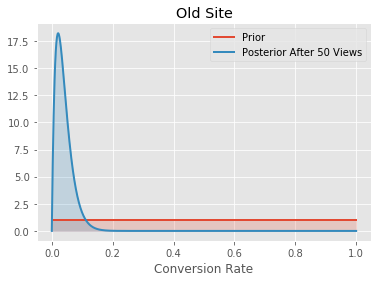

In [94]:
# Plot posterior after first 50 views of old site
y_50a = get_pdf(x, old_site[:50])

plot_with_fill(x, y_prior, 'Prior')
plot_with_fill(x, y_50a, 'Posterior After 50 Views')
plt.title('Old Site')
plt.xlabel('Conversion Rate')

In [114]:
# Graph multiple views
views = [50, 100, 200, 400, 800]

# Create our y_a for each view count in views
y_a = [get_pdf(x, old_site[:view]) for view in views]

# Create the labels for passing to the plot_with_fill function
labels = ['Posterior After {} Views'.format(view) for view in views]

(0, 0.15)

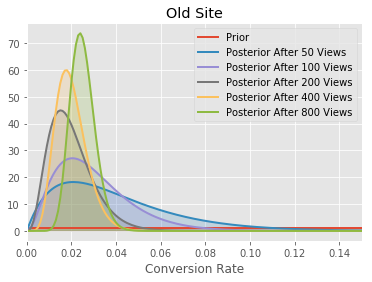

In [115]:
# Plot all these at once
plot_with_fill(x, y_prior, 'Prior')
for y, label in zip(y_a, labels):
    plot_with_fill(x, y, label)
plt.title('Old Site')
plt.xlabel('Conversion Rate')
plt.xlim([0, 0.15])

(0, 0.15)

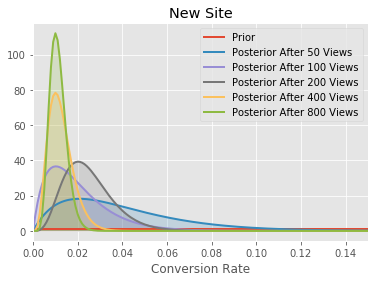

In [116]:
#Same thing for new site 

y_b = [get_pdf(x, new_site[:view]) for view in views]
labels = ['Posterior After {} Views'.format(view) for view in views]

plot_with_fill(x, y_prior, 'Prior')
for y, label in zip(y_b, labels):
    plot_with_fill(x, y, label)
plt.title('New Site')
plt.xlabel('Conversion Rate')
plt.xlim([0, 0.15])

Text(0.5,0,'Conversion Rate')

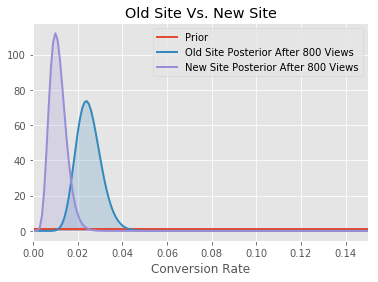

In [128]:
# Compare conversion rates after 800 views
y_a = get_pdf(x, old_site[:800])
y_b = get_pdf(x, new_site[:800])

plot_with_fill(x, y_prior, 'Prior')
plot_with_fill(x, y_a, 'Old Site Posterior After 800 Views')
plot_with_fill(x, y_b, 'New Site Posterior After 800 Views')

plt.xlim(0, 0.15)
plt.title('Old Site Vs. New Site')
plt.xlabel('Conversion Rate')

Text(0.5,0,'Conversion Rate')

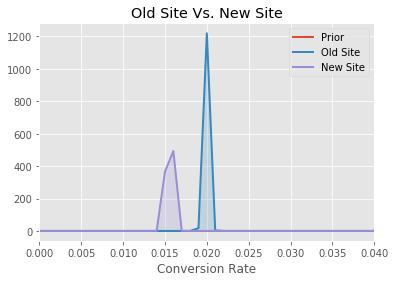

In [130]:
# Compare conversion rates overall
y_a = get_pdf(x, old_site)
y_b = get_pdf(x, new_site)

plot_with_fill(x, y_prior, 'Prior')
plot_with_fill(x, y_a, 'Old Site')
plot_with_fill(x, y_b, 'New Site')

plt.xlim(0, 0.04)
plt.title('Old Site Vs. New Site')
plt.xlabel('Conversion Rate')

**To see the probability that the new price is better than the old price, run a simulation and draw 10,000 points from each distribution. Count the number of times that what we drew from old site's distribution is larger than what we drew from new site's distribution. Divide by 10,000 to get the percent likelihood that new site is better than old site**

In [126]:
a_sample = np.random.beta(a=sum(old_site), b=len(old_site)-sum(old_site), size=10)
b_sample = np.random.beta(a=sum(new_site), b=len(new_site)-sum(new_site), size=10)

# a_sample = scs.beta.rvs(a=sum(old_site), b=(len(old_site)-sum(old_site)), size=100000)
# b_sample = scs.beta.rvs(a=sum(new_site), b=(len(new_site)-sum(new_site)), size=100000)

# Now let's get the percentage of the time that the draw from Site B
# is larger than the draw from Site A
prob = (b_sample > a_sample).mean() * 100
print(
    'There is a {:.2f}% probability that the new site is better than the old site'.format(prob))

There is a 0.00% probability that the new site is better than the old site


**Seems that old site is better. This makes sense given the conversion rate graph above. BUT, one conversion in the new site results in $20 profit. So calculate expected profit differences between each site**

In [100]:
expect_a = a_sample.mean()

In [101]:
expect_b = b_sample.mean()

In [131]:
def expected_profit_difference(hits, expect_a, expect_b):
    ''' Returns the expected profit from switching from A to B

    Parameters
    -----------
    hits : int number of clicks you expect your site to recieve
    expect_a : Expected value of old site
    expect_b : Expected value of new site

    Returns
    --------
    profit : float
    '''
    return expect_b * 20.00 * hits - expect_a * 1.00 * hits

In [105]:
hits = [100 * 10**p for p in range(6)]
diffs = [expected_profit_difference(hit, expect_a, expect_b) for hit in hits]
for hit, diff in zip(hits, diffs):
    print("Expected difference of ${:.2f} for {} hits".format(diff, hit))

Expected difference of $29.09 for 100 hits
Expected difference of $290.89 for 1000 hits
Expected difference of $2908.92 for 10000 hits
Expected difference of $29089.23 for 100000 hits
Expected difference of $290892.26 for 1000000 hits
Expected difference of $2908922.63 for 10000000 hits


## Conclusion
In conclusion, while the conversion rate is lower for the new site, the profit per hit is sufficient such that the company may justify increase the selling price.

The VP of Product is also correct in thinking that she would be able to get results in a shorter amount of time. With a Bayesian approach, we determined that while the old site is better for conversion, the profit of the new site conversions justify the increase in price after ~800 visits. With a Frequentist approach, we would have waited for ~300,000 visits to the site to obtain a result.